<a href="https://colab.research.google.com/github/luccidomingues/Comparing-classifiers/blob/main/Projects_unfinished_comparing_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing Classifiers for Building Classification Models


In this Jupyter notebook, we will be comparing the performance of different classifiers for building classification models.

## 1. Import a  dataset

### 1.1. Import library

In [ ]:
import pandas as pd

projects = 'projects.csv'
dataset = pd.read_csv(projects)
dataset

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [ ]:
X = dataset.drop(['unfinished'], axis=1)
Y = dataset.iloc[:,0]
X

0       1
1       1
2       1
3       1
4       1
       ..
2152    0
2153    1
2154    0
2155    0
2156    1
Name: unfinished, Length: 2157, dtype: int64

### 1.2. Let's examine the data dimension

In [ ]:
X.shape

(2157, 2)

In [ ]:
Y.shape

(2157,)

## 2. Data split (80/20 ratio)

### 2.1. Import library

In [ ]:
from sklearn.model_selection import train_test_split

### 2.2. Data split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)



### 2.3. Let's examine the data dimension

In [ ]:
X_train.shape, Y_train.shape

((1725, 2), (1725,))

In [ ]:
X_test.shape, Y_test.shape

((432, 2), (432,))

## 3. Build Classification Models

Modified from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

### 3.1. Import modules

In [ ]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

### 3.2. Defining learning classifiers

In [ ]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

### 3.3. Build Model, Apply Model on Test Data & Record Accuracy Scores

In [ ]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [ ]:
scores

[0.7129629629629629,
 0.5671296296296297,
 0.5509259259259259,
 0.5717592592592593,
 0.7916666666666666,
 0.7592592592592593,
 0.7314814814814815,
 0.7847222222222222,
 0.7638888888888888,
 0.6504629629629629,
 0.7800925925925926,
 0.5208333333333334,
 0.5162037037037037,
 0.5925925925925926]

## 4. Analysis of Model Performance

### 4.1. Import library

In [ ]:
import pandas as pd
import seaborn as sns

### 4.2. Create data frame of *model performance*

In [ ]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.712963
1,Linear_SVM,0.567130
2,Polynomial_SVM,0.550926
3,RBF_SVM,0.571759
4,Gaussian_Process,0.791667
5,Gradient_Boosting,0.759259
6,Decision_Tree,0.731481
7,Extra_Trees,0.784722
8,Random_Forest,0.763889
9,Neural_Net,0.650463


### 4.3. Adding colors to the data frame

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.712963
1,Linear_SVM,0.567130
2,Polynomial_SVM,0.550926
3,RBF_SVM,0.571759
4,Gaussian_Process,0.791667
5,Gradient_Boosting,0.759259
6,Decision_Tree,0.731481
7,Extra_Trees,0.784722
8,Random_Forest,0.763889
9,Neural_Net,0.650463


### 4.4. Bar plot of model performance

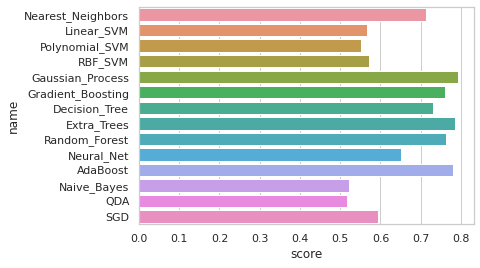

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

---